This answer page shows the results of trying different values of `noise` and `n_neighbors` when fitting k-NN to a dummy data set. For you to complete the exercise I would just expect you to maually change the values and rerun the cells to look at the differences. On this page I have done something a little more complicated in order to visualise all the combinations in one plot.

In [1]:
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

We'll loop over a range of noises and neighbour counts

In [2]:
noises = [0.15, 0.3]
neighbours = [1, 5, 10, 100, 200]

To visualise the results, we'll use the same `plot_knn` function from before.

In [3]:
from plot import plot_knn

We then loop over the range of values we want, generate the data, fit the model and plot the result for each.

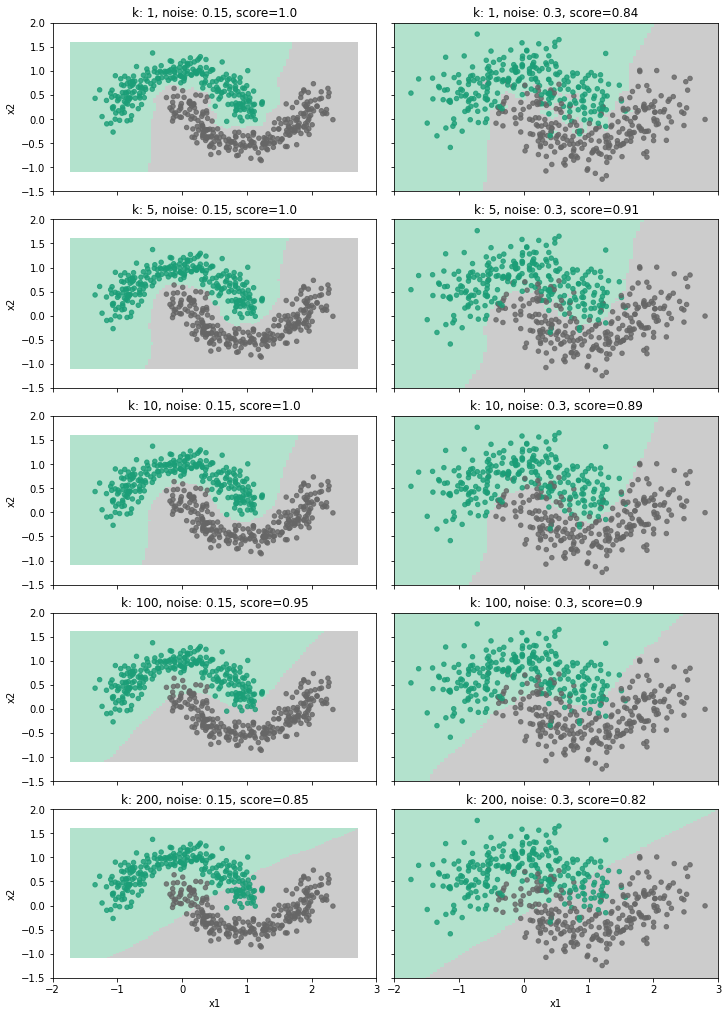

In [4]:
# We'll plot the results in a grid of subplots
fig, axs = plt.subplots(
    nrows=len(neighbours),
    ncols=len(noises),
    figsize=(10, 14),
    constrained_layout=True,
    sharex=True,
    sharey=True
)

for col, noise in enumerate(noises):
    for row, n_neighbors in enumerate(neighbours):
        # Make the dummy data (uses the `noise` variable)
        X, y = make_moons(n_samples=500, noise=noise, random_state=42)
        X = DataFrame(X, columns=["x1", "x2"])
        train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
        
        # Fit and score the model (uses the `n_neighbors` variable)
        model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(train_X, train_y)
        score = model.score(test_X, test_y)

        # Plot the results in the grid of subplots
        ax = axs[row, col]
        ax.set_xlim(-2, 3)
        ax.set_ylim(-1.5, 2)
        ax.set_title(f"k: {n_neighbors}, noise: {noise}, score={score:.2}")
        plot_knn(model, X, y, ax=ax)